Pneumonia is one of the leading respiratory illnesses worldwide, and its timely and accurate diagnosis is essential for effective treatment. Manually reviewing chest X-rays is a critical step in this process, and AI can provide valuable support by helping to expedite the assessment. In your role as a consultant data scientist, you will test the ability of a deep learning model to distinguish pneumonia cases from normal images of lungs in chest X-rays.

By fine-tuning a pre-trained convolutional neural network, specifically the ResNet-18 model, your task is to classify X-ray images into two categories: normal lungs and those affected by pneumonia. You can leverage its already trained weights and get an accurate classifier trained faster and with fewer resources.

## The Data

<img src="x-rays_sample.png" align="center"/>
&nbsp

You have a dataset of chest X-rays that have been preprocessed for use with a ResNet-18 model. You can see a sample of 5 images from each category above. Upon unzipping the `chestxrays.zip` file (code provided below), you will find your dataset inside the `data/chestxrays` folder divided into `test` and `train` folders. 

There are 150 training images and 50 testing images for each category, NORMAL and PNEUMONIA (300 and 100 in total). 

## 1. Load data

In [3]:
import os
import zipfile

# Unzip the data folder
if not os.path.exists('data/chestxrays'):
    with zipfile.ZipFile('data/chestxrays.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

In [93]:
from tensorflow.keras.preprocessing import image

data_generator = image.ImageDataGenerator(
    # preprocessing_function = preprocess_input,
    rescale = 1./255,
)
train_dataload = data_generator.flow_from_directory(
    'data/chestxrays/train',
    batch_size = 40,
    target_size = (224, 224),
    class_mode = 'binary'
)

Found 300 images belonging to 2 classes.


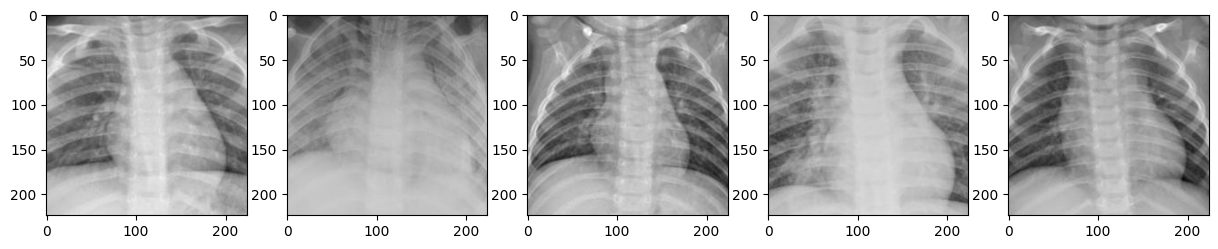

In [88]:
# Visualize a sample of images
imgs = train_dataload[0][0]
imgs.shape
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(imgs[i], cmap='gray')
plt.show()

## 2. Model

In [95]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import DenseNet121

base = DenseNet121(weights='imagenet')
for layer in base.layers[:-1]:
    layer.trainable = False

def customed_layers(base):
    x = Dense(512, activation='relu')(base.output)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    return x

model = Model(inputs=base.input, outputs=customed_layers(base))
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, 230, 230,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,739,369 (33.34 MB)

 Trainable params: 1,701,865 (6.49 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [97]:
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer='adam', 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])
model.fit(train_dataload, epochs=5)

Epoch 1/5


c:\Users\voqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5595 - loss: 0.6867
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8615 - loss: 0.5864
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8531 - loss: 0.4224
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8860 - loss: 0.3376
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8782 - loss: 0.3669


## 3. Evaluation and fine-tune the model

In [98]:
from tensorflow.keras.metrics import Accuracy, F1Score

test_dataload = data_generator.flow_from_directory(
    'data/chestxrays/test',
    batch_size = 40,
    target_size = (224, 224),
    class_mode = 'binary'
)
# Initialize metrics for accuracy and F1 score
accuracy = Accuracy()
f1 = F1Score()

Found 100 images belonging to 2 classes.


In [103]:
import numpy as np

pred = model.predict(test_dataload)
predicted_classes = np.rint(pred).astype(int)
predicted_classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

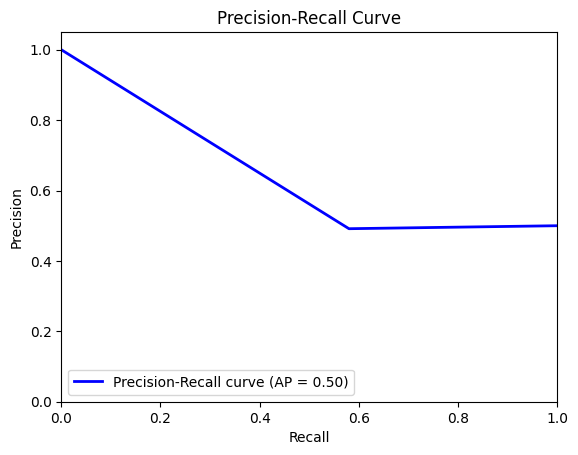

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
import mplcursors

# Assuming you have already trained your model and have the validation generator

# Compute Precision-Recall curve and average precision score
precision, recall, thresholds = precision_recall_curve(test_dataload.classes, predicted_classes)
average_precision = average_precision_score(test_dataload.classes, predicted_classes)

# Plot Precision-Recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend(loc="lower left")

# Add interactive cursor
cursor = mplcursors.cursor(ax, hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.index
    threshold = thresholds[index] if index < len(thresholds) else 'N/A'
    sel.annotation.set(text=f'Threshold: {threshold}\nPrecision: {precision[index]:.4f}\nRecall: {recall[index]:.4f}')
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.8)

plt.show()